# Handwritten Digit Recognition (PART1) 🚀

In this notebook, we're embarking on an exciting journey to develop a basic understanding of building and training a neural network for recognizing handwritten digits using PyTorch. We'll dive into the world of the MNIST dataset 📊, a classic in the machine learning community, renowned for its collection of black and white images of digits from 0 to 9.

This lab is designed to empower you with key skills and concepts in deep learning:

    🧠 Understand Gradient Descent from Scratch
    📚 Load Dataset using PyTorch
    🏗️ Build a Neural Network using PyTorch
    🚀 Start the training script and watch your neural network learn!

Let's get started and unlock the potential of neural networks in digit recognition! 💡🔍




## PART1: Gradient Descent
GD is an algorithm that help us find the minimum of the error function. It is an important algorithm used in all deep learning projects.

In this first part, we are going to develop GD from scratch to learn how it works. We are going to go through GD using our example in the course (pass/fail).

In [ ]:
import matplotlib.pyplot as plt # visualization
import numpy as np # numerical operation / fast tensors and arrays
import pandas as pd # tabular manipulation

In [ ]:
# DO NOT TOUCH (These are helper function)
# Some helper functions for plotting and drawing lines
def plot_points(X, y):
    passed = X[np.argwhere(y==1)]
    failed = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in failed], [s[0][1] for s in failed], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in passed], [s[0][1] for s in passed], s = 25, color = 'red', edgecolor = 'k')


def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [ ]:
# DO NOT CHANGE
# Generating random dataset.
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

mean_pass = [0.5, 0.8]
cov_pass = [[0.01, 0], [0, 0.02]]  # Diagonal covariance

mean_fail = [0.3, 0.3]
cov_fail = [[0.01, 0], [0, 0.02]]

# Generate 'pass' and 'fail' data
pass_students = np.random.multivariate_normal(mean_pass, cov_pass, 50)
fail_students = np.random.multivariate_normal(mean_fail, cov_fail, 50)

# Create dataframes for pass and fail students
df_pass = pd.DataFrame(pass_students, columns=['Hours', 'Attendance'])
df_pass['Label'] = 1

df_fail = pd.DataFrame(fail_students, columns=['Hours', 'Attendance'])
df_fail['Label'] = 0

# Combine the two dataframes into one
df = pd.concat([df_pass, df_fail], ignore_index=True)

df.head()

,Hours,Attendance,Label
0,0.540016,1.049475,1
1,0.724089,0.938414,1
2,0.402272,1.064113,1
3,0.484864,0.934363,1
4,0.541060,0.785403,1


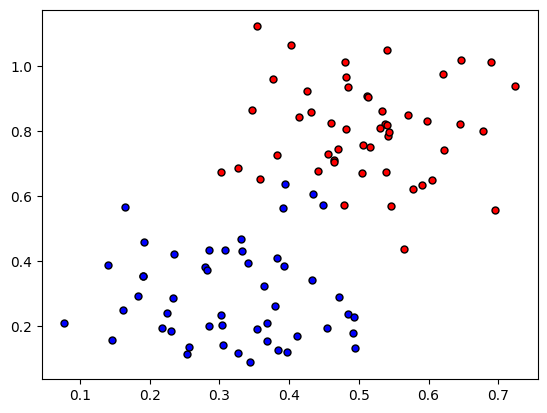

In [ ]:
X = np.array(df[["Hours","Attendance"]])
y = np.array(df['Label'])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [ ]:
# TODO: Implement the following functions
# Activation (sigmoid) function
def sigmoid(x):
    return

# Output (prediction) formula
def output_formula(features, weights, bias):
    return

# Error (log-loss) formula (cross entropy)
def error_formula(y, output):
    return


# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output =
    error =
    weights +=
    bias +=
    return weights, bias

### Training Function (using GD)

In [ ]:
# TODO: Complete this code
np.random.seed(44) # it is for reproducibility, it helps define the random distribution
epochs =
learnrate =

def train(features, targets, epochs, learnrate, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0

    # CHANGE HERE
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output =
            error =
            weights, bias =

        # STOP CHANGING
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

###🏋️‍♂️ Training Time: Watch the Algorithm Learn!

By initiating the training function, we're going to witness our model's learning process in real-time! Here's what to expect as the magic unfolds:

* **Progress Updates:** Get ready for a series of 10 informative updates, complete with the current training loss and accuracy metrics. Watch as the numbers evolve, showcasing the algorithm's improvement with each epoch.

* **Visual Insights:** A dynamic plot will bring our data to life, along with the progression of boundary lines that our model generates. Keep an eye on the black line – that's our model's final hypothesis. Observe how each iteration nudges the boundaries closer to the ideal fit. It's like watching the algorithm's thought process visualized!

* **Error Trends:** Another plot will graph the journey of our error function. Anticipate a satisfying downward trend as the epochs roll by, indicating that our model is minimizing mistakes and maximizing precision.

So, let's hit 'Run' and watch the algorithm flex its computational muscles towards achieving peak performance! 🚀


========== Epoch 0 ==========
Train loss:  0.6066527671520761
Accuracy:  0.76

========== Epoch 3 ==========
Train loss:  0.5777932091602636
Accuracy:  0.91

========== Epoch 6 ==========
Train loss:  0.5496400838374528
Accuracy:  0.91

========== Epoch 9 ==========
Train loss:  0.5236190949625279
Accuracy:  0.91

========== Epoch 12 ==========
Train loss:  0.5002756032265497
Accuracy:  0.92

========== Epoch 15 ==========
Train loss:  0.47943817983604914
Accuracy:  0.92

========== Epoch 18 ==========
Train loss:  0.4608041888961253
Accuracy:  0.93

========== Epoch 21 ==========
Train loss:  0.44408036236634985
Accuracy:  0.93

========== Epoch 24 ==========
Train loss:  0.4290087805880707
Accuracy:  0.94

========== Epoch 27 ==========
Train loss:  0.41536833179119825
Accuracy:  0.94


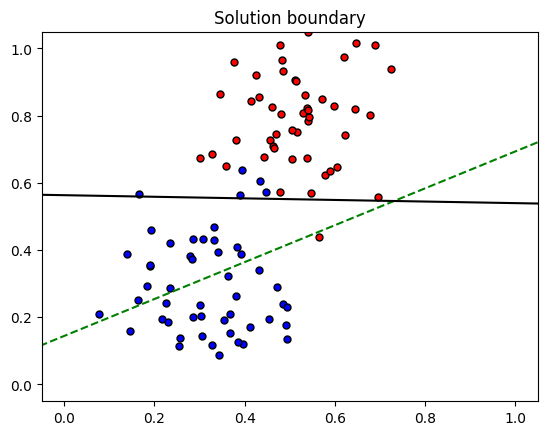

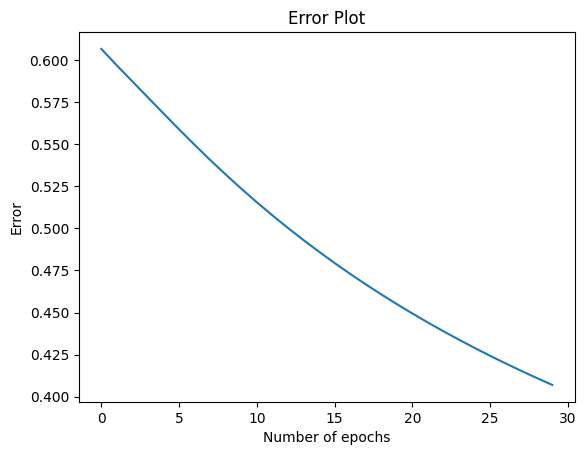

In [ ]:
train(X, y, epochs, learnrate, True)

In [ ]:
# TODO: experiment with different learning rates !


## PART2: PyTorch 🛠️

PyTorch is an open-source deep learning library, widely used for applications such as computer vision and natural language processing. It is known for its flexibility and ease of use, especially when it comes to building and experimenting with neural network architectures. Developed by the Facebook AI Research lab, PyTorch provides two high-level features: Tensor computation (like NumPy) with strong GPU acceleration, and Deep Neural Networks built on a tape-based autograd system. It's particularly favored for its dynamic computational graph and efficient memory usage, which makes it a go-to tool for researchers and developers alike.

### Loading the MNIST Dataset
The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits. We will load this dataset and prepare it for training our neural network. It is a "Hello, World!" of computer vision, providing a manageable dataset to train basic image processing and pattern recognition algorithms.

Let's dive into the data loading process!



In [ ]:
a = np.array([1, 2, 3])
print(type(a))

<class 'numpy.ndarray'>


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Loading MNIST dataset from torchvision
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# TODO: Load the test set (Use the same thing as train_set)
test_set =
test_loader =

100%|██████████| 9912422/9912422 [00:00<00:00, 148944816.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29917434.88it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37129312.52it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11839980.59it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Displaying Images and Their Labels
Let's visualize some of the images in our dataset along with their corresponding labels.


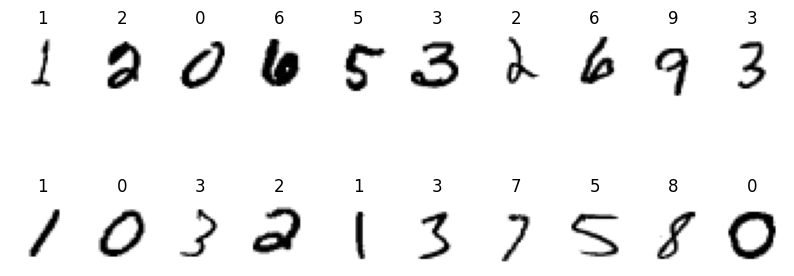

In [ ]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, labels):
    plt.figure(figsize=(10, 4))
    for i in range(20):
        plt.subplot(2, 10, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')
        plt.title(labels[i].item())
        plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# Display images
show_images(images, labels)


# TODO: Explore different batches and display their images and labels

## Building a Fully Connected Neural Network
We will now define our neural network architecture. We'll start with a simple fully connected network with a single hidden layer.

When using an image in a fully connected neural network, we need to change its dimension.
![](https://miro.medium.com/v2/resize:fit:1400/1*IWUxuBpqn2VuV-7Ubr01ng.png)

In [ ]:
# TODO: Complete this code
# Fill the size of the input and output to the layer
import torch.nn as nn
import torch.nn.functional as F

# Neural network with a single fully connected layer
class SimpleNet(nn.Module):
    # executed when model is created
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear()  # TODO: Define the fully connected layer

    # executed when model is called to get output
    def forward(self, x):
        x = x.view(-1, )  # Flatten the image
        x = self.fc1(x) # w1x1 + w2x2+w3x3.... + w784x784 + b
        return F.log_softmax(x, dim=1) # turn output to probabilities

# Create an instance of the network
model = SimpleNet()
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


## Training the Model
Next, we'll define the training loop. We will train our model using gradient descent.


In [ ]:
# TODO: Complete this code
import torch.optim as optim

# Loss function and optimizer
criterion =  # loss function
optimizer = optim.SGD()

# Training loop
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Complete the training loop
        # nullify the gradients
        optimizer.zero_grad()
        # compute outputs
        outputs =

        # compute loss
        loss =

        # execute backward and optimize
        loss.
        optimizer.

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss {running_loss/len(train_loader)} ")

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Epoch 1, Loss 28.017272781811034 
Epoch 2, Loss 23.918863086049743 
Epoch 3, Loss 22.84679045669411 
Epoch 4, Loss 22.378968476105346 
Epoch 5, Loss 22.124428437544914 
Epoch 6, Loss 21.943688250538003 
Epoch 7, Loss 21.796057256024117 
Epoch 8, Loss 21.68666160945445 
Epoch 9, Loss 21.572046463099767 
Epoch 10, Loss 21.467416993550845 
Model's state_dict:
fc1.weight 	 torch.Size([10, 784])
fc1.bias 	 torch.Size([10])


## Model Evaluation
Finally, let's evaluate the performance of our model on the test dataset.


In [ ]:
# TODO: Write the evaluation loop

# Conclusion
In this notebook, we covered the basics of loading a dataset, visualizing it, building a simple neural network, and training it. We encourage you to experiment with different network architectures, learning rates, and other hyperparameters.

## Additional Resources
- [PyTorch Official Documentation](https://pytorch.org/docs/stable/index.html)
- [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [Neural Networks and Deep Learning by Michael Nielsen](http://neuralnetworksanddeeplearning
